# Telco Churn Analysis

**Objective**: Analyze customer churn patterns using correlation, statistical inference, and logistic regression. 
Identify significant features affecting churn probability and visualize their effects.

Steps include:
1. Data preprocessing and encoding categorical variables.
2. Correlation analysis for demographics, finance, services, and contract features.
3. Chi-square tests for categorical feature significance.
4. Binary inference modeling (Logit, Probit, Cloglog, Penalized, Bayesian Approx).
5. Feature significance and marginal effects visualization.
6. Predictive visualization for key numerical features (e.g., tenure).

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## 1. Load Data
Load the cleaned Telco dataset

In [2]:
df=pd.read_csv("D:\\DATA SCIENCE\\CHURN PROJ\\TELCO_CLEANED.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Identify Categorical and Numerical Columns

In [3]:
Cat_cols = df.select_dtypes(include=['object']).columns
Num_cols = df.select_dtypes(include=['int64', 'float64']).columns

## 3. Encode Categorical Columns
Using LabelEncoder to convert string categories into numeric labels

In [4]:
le = LabelEncoder()

for col in Cat_cols:
    df[col] = le.fit_transform(df[col])

In [5]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


## 4. Feature Groups
Group features into demographics, finance, services, and contract-related features for correlation analysis

In [6]:
demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
finances = ['tenure', 'MonthlyCharges', 'TotalCharges']
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']
contract = ['Contract', 'PaperlessBilling', 'PaymentMethod']
target = ['Churn']

## 5. Correlation Analysis
Compute correlation of each feature group with Churn

In [7]:
corr_demo = df[demographics + target].corr()
corr_finance = df[finances + target].corr()
corr_services = df[services + target].corr()
corr_contract = df[contract + target].corr()

In [8]:
import seaborn as sns

### 5a. Demographics Correlation

<Axes: >

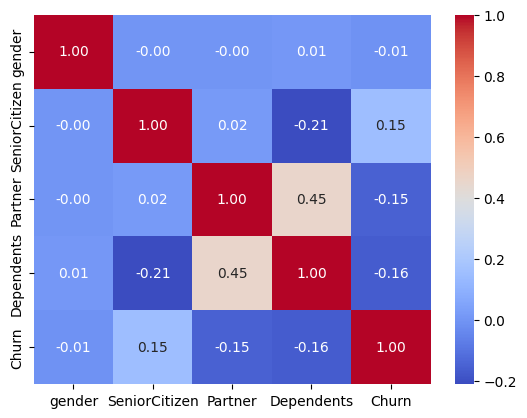

In [9]:
sns.heatmap(corr_demo, annot=True, fmt=".2f", cmap="coolwarm")

### 5b. Finance Correlation

<Axes: >

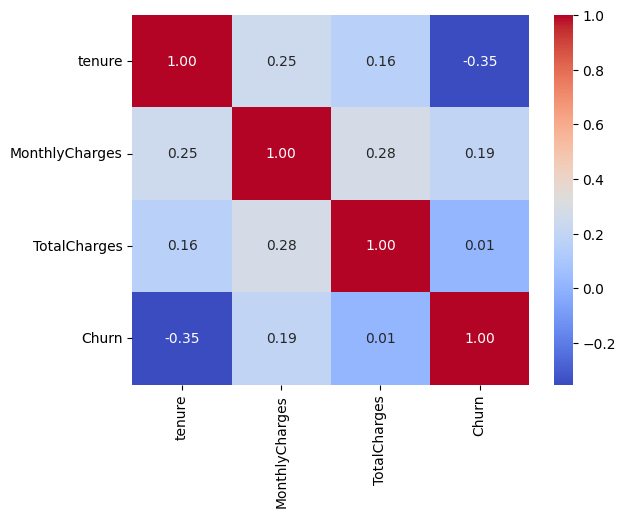

In [10]:
sns.heatmap(corr_finance, annot=True, fmt=".2f", cmap="coolwarm")

### 5c. Services Correlation

<Axes: >

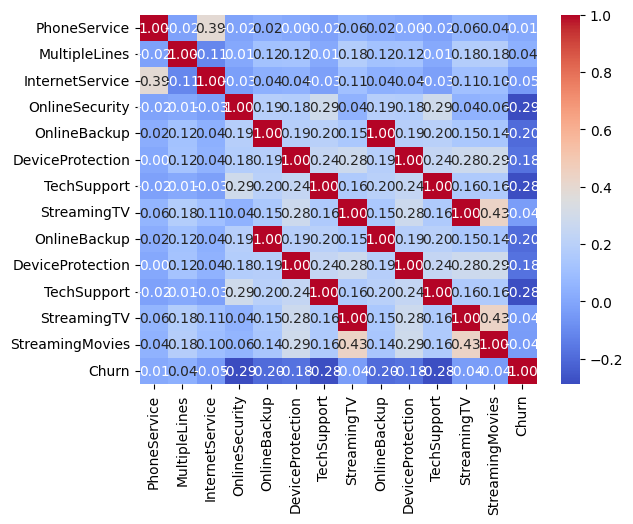

In [11]:
sns.heatmap(corr_services, annot=True, fmt=".2f", cmap="coolwarm")

### 5d. Contract Correlation

<Axes: >

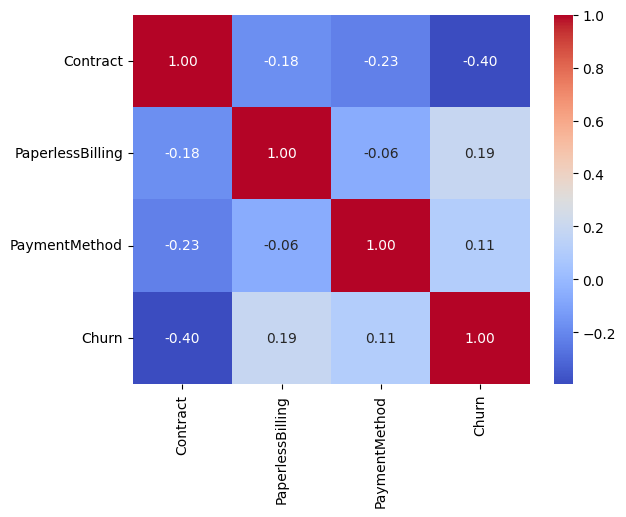

In [12]:
sns.heatmap(corr_contract, annot=True, fmt=".2f", cmap="coolwarm")

## 6. Chi-Square Test for Categorical Features
Evaluate statistical significance between categorical features and Churn

In [13]:
import scipy.stats as stats

categorical_features = ["gender", "Partner", "Dependents", "PhoneService", 
                        "MultipleLines", "InternetService", "OnlineSecurity",
                        "OnlineBackup", "DeviceProtection", "TechSupport",
                        "StreamingTV", "StreamingMovies", "Contract", 
                        "PaperlessBilling", "PaymentMethod"]

for col in categorical_features:
    contingency = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f}")
    if p < 0.05:
        print(f"  -> Significant relationship with Churn")
    else:
        print(f"  -> No significant relationship")

gender: p-value = 0.4866
  -> No significant relationship
Partner: p-value = 0.0000
  -> Significant relationship with Churn
Dependents: p-value = 0.0000
  -> Significant relationship with Churn
PhoneService: p-value = 0.3388
  -> No significant relationship
MultipleLines: p-value = 0.0035
  -> Significant relationship with Churn
InternetService: p-value = 0.0000
  -> Significant relationship with Churn
OnlineSecurity: p-value = 0.0000
  -> Significant relationship with Churn
OnlineBackup: p-value = 0.0000
  -> Significant relationship with Churn
DeviceProtection: p-value = 0.0000
  -> Significant relationship with Churn
TechSupport: p-value = 0.0000
  -> Significant relationship with Churn
StreamingTV: p-value = 0.0000
  -> Significant relationship with Churn
StreamingMovies: p-value = 0.0000
  -> Significant relationship with Churn
Contract: p-value = 0.0000
  -> Significant relationship with Churn
PaperlessBilling: p-value = 0.0000
  -> Significant relationship with Churn
PaymentMet

## 7. Binary Inference Models
Fit multiple binary response models (Logit, Probit, Cloglog, Penalized, Bayesian Approx)
Evaluate using log-likelihood, AIC, BIC, and pseudo R-squared.

In [14]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [21]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [22]:
def evaluate_binary_inference_models(X, y):
    X_const = sm.add_constant(X)
    results = []

    # Logit
    logit = sm.Logit(y, X_const).fit(disp=0)
    llnull = sm.Logit(y, np.ones((len(y),1))).fit(disp=0).llf
    pseudo_r2 = 1 - (logit.llf / llnull)
    results.append({'Model':'Logit','LogLik':logit.llf,'AIC':logit.aic,'BIC':logit.bic,'PseudoR2':pseudo_r2})

    # Probit
    probit = sm.Probit(y, X_const).fit(disp=0)
    pseudo_r2 = 1 - (probit.llf / llnull)
    results.append({'Model':'Probit','LogLik':probit.llf,'AIC':probit.aic,'BIC':probit.bic,'PseudoR2':pseudo_r2})

    # Cloglog
    cloglog = sm.GLM(y, X_const, family=sm.families.Binomial(link=sm.families.links.cloglog())).fit()
    pseudo_r2 = 1 - (cloglog.llf / llnull)
    results.append({'Model':'Cloglog','LogLik':cloglog.llf,'AIC':cloglog.aic,'BIC':cloglog.bic,'PseudoR2':pseudo_r2})

    # Penalized Logit (L1)
    penalized = sm.Logit(y, X_const).fit_regularized(method='l1', alpha=0.01, disp=0)
    pseudo_r2 = 1 - (penalized.llf / llnull)
    results.append({'Model':'Penalized Logit (L1)','LogLik':penalized.llf,'AIC':np.nan,'BIC':np.nan,'PseudoR2':pseudo_r2})

    # Bayesian Approx (L2)
    sk_logit = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
    sk_logit.fit(X, y)
    p = sk_logit.predict_proba(X)[:, 1]
    eps = 1e-15
    log_likelihood = np.sum(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))
    pseudo_r2 = 1 - (log_likelihood / llnull)
    results.append({'Model':'Bayesian Approx (L2)','LogLik':log_likelihood,'AIC':np.nan,'BIC':np.nan,'PseudoR2':pseudo_r2})

    df_result = pd.DataFrame(results)
    return df_result.sort_values('PseudoR2', ascending=False)

In [23]:
# === Execute ===
hasil_inferensi = evaluate_binary_inference_models(X, y)
print("=== Binary Inference Model Metrics ===")
print(hasil_inferensi)

c:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The cloglog link alias is deprecated. Use CLogLog instead. The cloglog link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
c:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.p

=== Binary Inference Model Metrics ===
                  Model       LogLik          AIC           BIC  PseudoR2
2               Cloglog -2926.347924  5892.695847 -56369.605774  0.281891
0                 Logit -2932.505327  5905.010654   6042.206444  0.280380
3  Penalized Logit (L1) -2932.505332          NaN           NaN  0.280380
4  Bayesian Approx (L2) -2932.549608          NaN           NaN  0.280369
1                Probit -2941.015765  5922.031531   6059.227320  0.278291


c:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8. Fit Logit Model and Analyze Significance
Examine coefficients, p-values, odds ratios, and marginal effects to interpret feature influence on churn.

In [24]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

=== Logit Model Feature Significance ===
             Feature      Coef    StdErr    z-value       p-value  Odds_Ratio
5             tenure -0.035042  0.002371 -14.780645  1.952875e-49       0.966
18    MonthlyCharges  0.027717  0.001909  14.519426  9.127118e-48       1.028
15          Contract -0.727626  0.076613  -9.497407  2.151811e-21       0.483
0              const -1.131498  0.158406  -7.143043  9.128686e-13       0.323
6       PhoneService -0.996109  0.143004  -6.965588  3.270356e-12       0.369
9     OnlineSecurity -0.258186  0.041436  -6.231005  4.634513e-10       0.772
12       TechSupport -0.247491  0.041964  -5.897706  3.685895e-09       0.781
16  PaperlessBilling  0.350863  0.074083   4.736056  2.179169e-06       1.420
8    InternetService  0.259529  0.064410   4.029322  5.593799e-05       1.296
19      TotalCharges  0.000060  0.000018   3.394523  6.874830e-04       1.000
10      OnlineBackup -0.125840  0.037979  -3.313373  9.217786e-04       0.882
2      SeniorCitizen  0

C:\Users\emanu\AppData\Local\Temp\ipykernel_19168\2577091040.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mfx, y='Feature', x='dy/dx', palette='coolwarm')


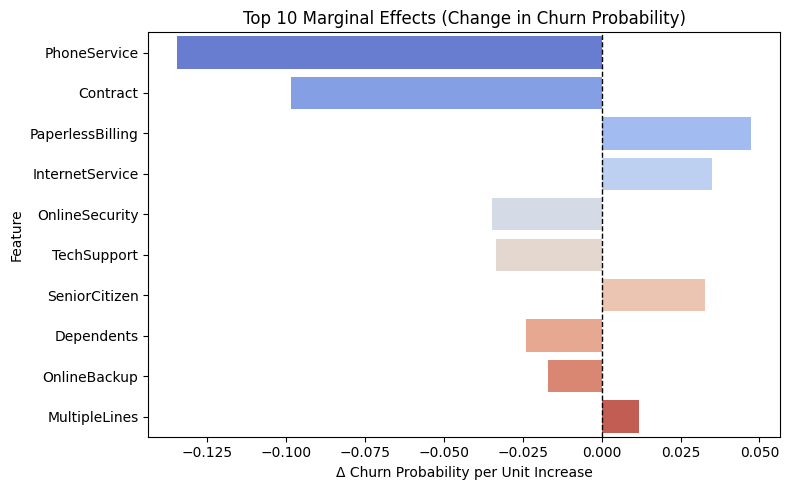

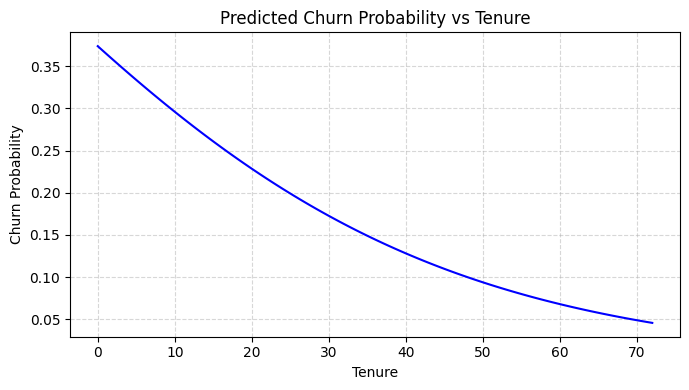

In [25]:
# === 1. Fit Logit Model ===
X_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_const).fit(disp=0)

# === 2. Summary Table with Feature Significance ===
summary_table = pd.DataFrame({
    'Feature': logit_model.params.index,
    'Coef': logit_model.params.values,
    'StdErr': logit_model.bse.values,
    'z-value': logit_model.tvalues.values,
    'p-value': logit_model.pvalues.values,
    'Odds_Ratio': np.exp(logit_model.params.values).round(3)
})
print("=== Logit Model Feature Significance ===")
print(summary_table.sort_values('p-value'))

# === 3. Marginal Effects ===
mfx = logit_model.get_margeff(at='mean').summary_frame().reset_index().rename(columns={'index': 'Feature'})
pval_col = [c for c in mfx.columns if 'P>' in c or 'p' in c.lower()][0]

print("\n=== Marginal Effects at Mean ===")
print(mfx[['Feature', 'dy/dx', 'Std. Err.', pval_col]])

# === 4. Visualize Top 10 Marginal Effects ===
top_mfx = mfx.reindex(mfx['dy/dx'].abs().sort_values(ascending=False).index).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_mfx, y='Feature', x='dy/dx', palette='coolwarm')
plt.title('Top 10 Marginal Effects (Change in Churn Probability)')
plt.xlabel('Δ Churn Probability per Unit Increase')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--', lw=1)
plt.tight_layout()
plt.show()

# === 5. Predictive Visualization for Tenure ===
if 'tenure' in X.columns:
    X_plot = pd.DataFrame(np.tile(X_const.mean().values, (100, 1)), columns=X_const.columns)
    tenure_range = np.linspace(X['tenure'].min(), X['tenure'].max(), 100)
    X_plot['tenure'] = tenure_range

    pred_prob = logit_model.predict(X_plot)

    plt.figure(figsize=(7, 4))
    plt.plot(tenure_range, pred_prob, color='blue')
    plt.title('Predicted Churn Probability vs Tenure')
    plt.xlabel('Tenure')
    plt.ylabel('Churn Probability')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()